In [1]:
import mesa

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from OD_model.model import opinionsModel
from OD_model.model import opinion_avg

# Stage 1. Simple OD model

### Initial opinion dynamic model, with the simplest set of assumptions.


**Assumptions:**
- Opinions represent probabilistic belife of the disease transmission risk (value between 0 and 1)
- Opinions are randomly initialized using normal distibution 
- opinions are divided into 2 categories representing low (<0.5) and high (>=0.5) risk opinions.
- All neighbors have the same weight
- new opinion = weighted average of the neighbours opinions (DeGroot Model)
- all agents have the same probabilty of uopdating their opinion
- all agents will always share thier opinions

**Network:** Barabási-Albert Scale-Free Network

**Opinions initialization:**  randomly initialized using normal distributed.

**Updating opinionas:** At each time step, each agent might update its opinion depending on the opinion update probability. The agents updates their opinions by talking the weighted average of the connected neighbours opinions following the approach proposed by DeGroot Model.

**End condition:** The simulation will stop once a convergence in the opinion state (high or low) is reached (all the agents opinions are above 0.5 or lower than 0.5). 



In [2]:
results_df = pd.read_csv('Results/V01.0._Simple_OD.csv')

In [6]:
results_df.head(4)

,RunId,iteration,Step,N,opinion_update_prob,high,low
0,0,0,35,10,0.2,1,9
1,1,0,1,10,0.5,1,9
2,2,0,3,10,0.8,1,9
3,3,0,25,20,0.2,19,1


For now, the model has only 2 parameters, “the number of agents in the network + the opinion update probability”
So to understand the current model behaviour I ran a number of simulations with different combinations of these parameters. And due to the stochastic nature of agent based models behaviour, I ran each combinations multiple times.

### Opinions Convergence Speed vs. Number of Agents with Different Opinion Update Probabilities

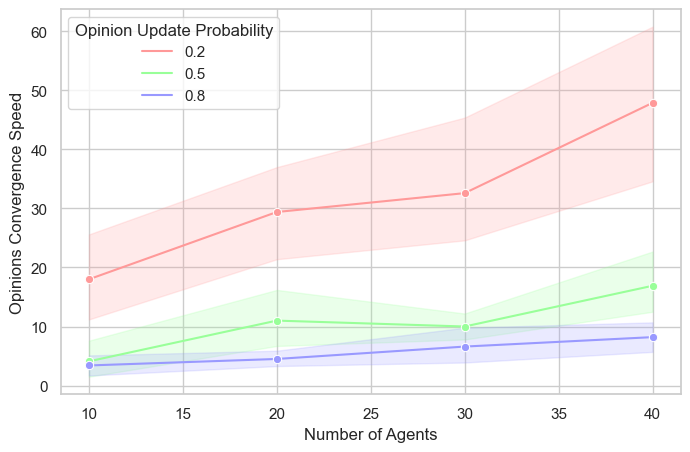

In [3]:
plt.figure(figsize=(8,  5))
pastel_colors = {0.2: "#FF9999", 0.5: "#99FF99", 0.8: "#9999FF"}
sns.lineplot(x="N", y="Step", hue="opinion_update_prob", data=results_df, marker="o", palette=pastel_colors)

plt.xlabel("Number of Agents")
plt.ylabel("Opinions Convergence Speed")
plt.legend(title="Opinion Update Probability")
plt.show()

The figure shows the recorded convergences speed of over 100 simulations and from this we can see that the number of agent have a bigger impact on the convergence speed when the agent are less likely to update their opinions. As we can see here when the opinion update probability is 0.2 the model takes longer time to reach convergence as the network size increases.  


### Number of Agents VS. Opinion Update Probabilities

# Stage 2. Extended OD model (Giardini & Vilone Model)


**Assumptions:**
- Population size: L = 1000
- Opinions -> values between 0 and 1 (subjective probability that the disaster will actually take place)
- opinions are randomly assigned always with uniform distribution, and they are updated on the bases of the interplay between internal characteristics of the agents.
- internal variables are randomly distributed, but the distribution is not necessarily uniform
- internal variables remain constant over time.
- When trust is 0 or close to it, the information received will not produce any change in the initial opinion
- Distinguish inter-individual trust from trust in official communication (peer trust and institutional trust)
- individual with low trust in institutions and experts -> trust more in people with the same views
- Given the same tendency to share -> more worried agents will speek more often
 
**Agent internal variables**
- Opinions (O): between 0 and 1 (variable)
- risk sensitivity (R): 0, 1 ,2 (constant)
- tendency to share (B): affected by R (constant) -> people who percieve the risk tend to talk about it more
- institutional trust (T) : btween 0 and 1 (constant)
- peer trust (P): Complement of T (constant)

**Network:** 
Complete graph (each agent is connected to every other agent)

**initialization:**  
- opinions: randomly assigned (uniform distribution)
- internal variables: randomly distributed (uniform distribution)
- Institional information (I) : set at the start and never change.

**Updating opinionas:** 
- Step 1: vertical communication -> Institution informs each and every agent about the official risk evaluation I
- Step 2: at each time step a pair of agent is randomly picked to engage in peer-to-peer symmetrical communication
- agents update their opinions following the same rule adopted in **Defuant Model**: New O = O + Trust in the source * (Information - O)
- Information could either be the institutional information or another agent opinion
- then update the opinion further according to the risk sensitivity:
    - If R = 0 -> New O = O / 2 (less sensitive agents will underestimate it)
    - If R = 1 -> New O = O (unbiased individuals, will not process the information any further)
    - If R = 2 -> New O = ( 1 + O ) / 2 (Risk sensitive individuals will overestimate)
- The propabilty that an agnet will share its opinion: O^(1/B)

**End condition:** 
The simulation ends after L time steps



### 2.1 Version 1: Replicating the model from the description in the paper

- There is no stopping condition
- I focused on the cases with different values for the isntituion information (skipped the case of no I)
- the model takes too long to run for L=1000 and 2000 iterations
- so I ran it for 100 agents
- Main issue: the dynamics are not maching what is presented in the paper

**(More to be added - what I am expectings (what is the result in the paper) + what I am getting)**

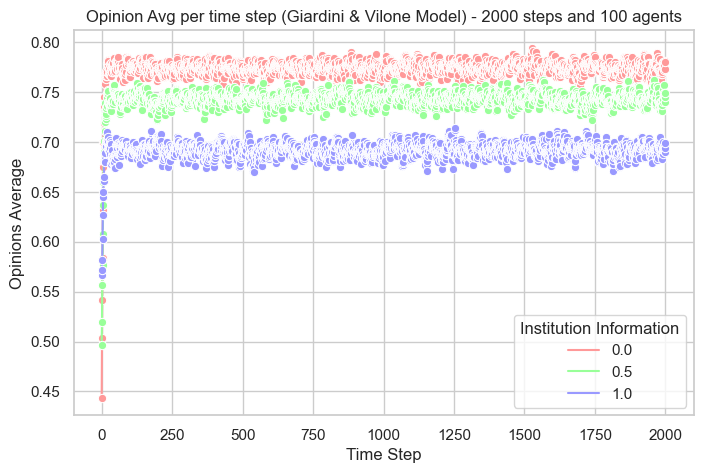

In [40]:
results_df1 = pd.read_csv('Results/V02.0_Extended_OD copy.csv')

plt.figure(figsize=(8,  5))
pastel_colors = {0: "#FF9999", 0.5: "#99FF99", 1: "#9999FF"}
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=results_df1, marker="o", palette=pastel_colors)

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step (Giardini & Vilone Model) - 2000 steps and 100 agents")
plt.show()

As the model almost reaches convergence (the avg opinions is above 0.5 from early steps) -> here I only plot the the results over the first 50 steps

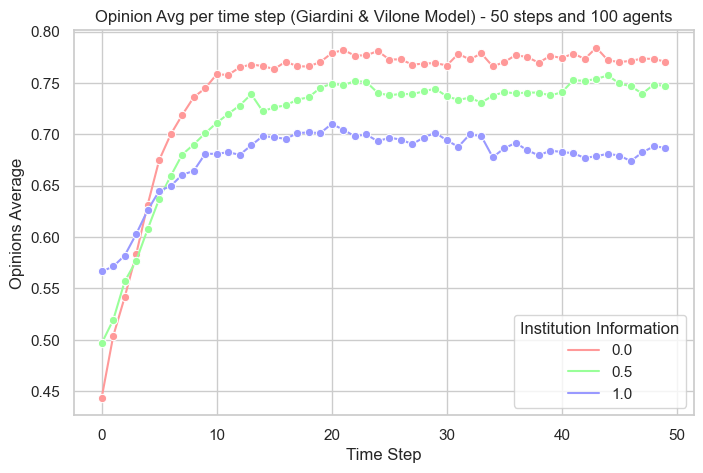

In [41]:
plt.figure(figsize=(8,  5))
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=results_df1.query('Step <50'), marker="o", palette=pastel_colors)

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step (Giardini & Vilone Model) - 50 steps and 100 agents")
plt.show()

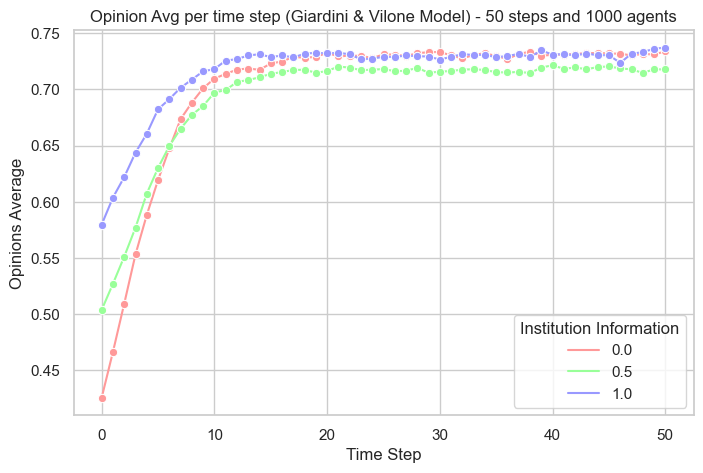

In [42]:
results_df2 = pd.read_csv('Results/V02.0_Extended_OD.csv')

plt.figure(figsize=(8,  5))
pastel_colors = {0: "#FF9999", 0.5: "#99FF99", 1: "#9999FF"}
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=results_df2, marker="o", palette=pastel_colors)

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step (Giardini & Vilone Model) - 50 steps and 1000 agents")
plt.show()

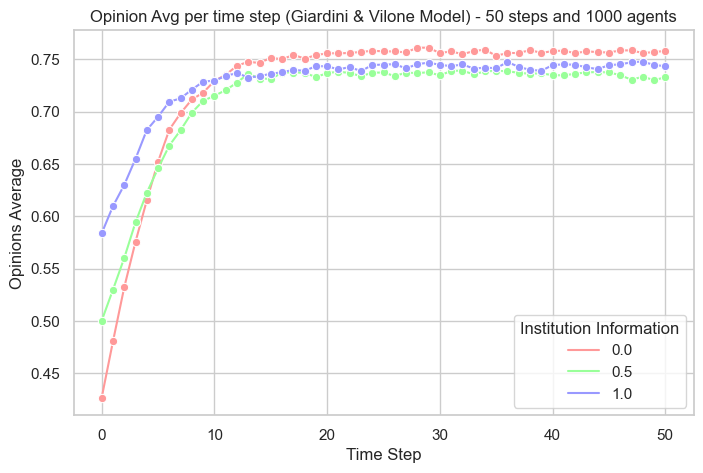

In [43]:
results_df2 = pd.read_csv('Results/V02.0_Extended_OD.csv')

plt.figure(figsize=(8,  5))
pastel_colors = {0: "#FF9999", 0.5: "#99FF99", 1: "#9999FF"}
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=results_df2, marker="o", palette=pastel_colors)

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step (Giardini & Vilone Model) - 50 steps and 1000 agents")
plt.show()

### 2.2 Version 2: Using their code in addition to the description to replicate the model

- I went through their code file and I noticed some procsess where not described in the paper
- **(state What are the things that where not included in the paper)**
- So I combined the knowaldge found in both the code and the paper to build the model
- I included the case with No I 
- the results for the No I matches the paper, but the rest of the cases don't

In [3]:
results_df3 = pd.read_csv('Results/V02.3_Extended_OD(With_NO_I).csv')

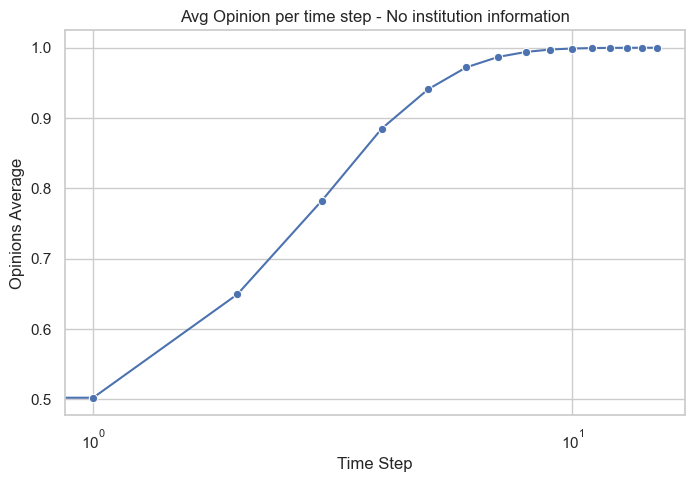

In [4]:
plt.figure(figsize=(8,  5))
sns.lineplot(x="Step", y="op_avg", data=results_df3.query('inst_info <0'), marker="o")

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
# plt.legend(title="Institution Information")
plt.title("Avg Opinion per time step - No institution information")
plt.xscale('log')
plt.show()

Here is the result for the cases with the institution information -> still don't mach the paper

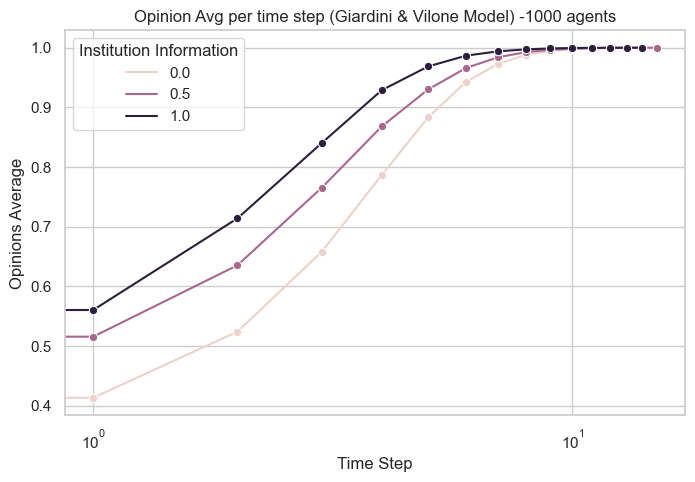

In [85]:
plt.figure(figsize=(8,  5))
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=results_df3.query('inst_info >= 0'), marker="o")

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step (Giardini & Vilone Model) -1000 agents")
plt.xscale('log')
plt.show()

In [71]:
avg_opinions = pd.read_csv('Results/V02.4_Extended_OD(avg_opinion).csv')
avg_opinions

,RunId,iteration,Step,N,inst_info,high,low,op_avg
0,0,0,17,1000,0.0,1000,0,0.999978
1,1,0,15,1000,0.1,1000,0,0.999973
2,2,0,16,1000,0.2,1000,0,0.999972
3,3,0,15,1000,0.3,1000,0,0.999973
4,4,0,15,1000,0.4,1000,0,0.999973
5,5,0,14,1000,0.5,1000,0,0.999963
6,6,0,15,1000,0.6,1000,0,0.999970
7,7,0,14,1000,0.7,1000,0,0.999973
8,8,0,14,1000,0.8,1000,0,0.999968
9,9,0,15,1000,0.9,1000,0,0.999976


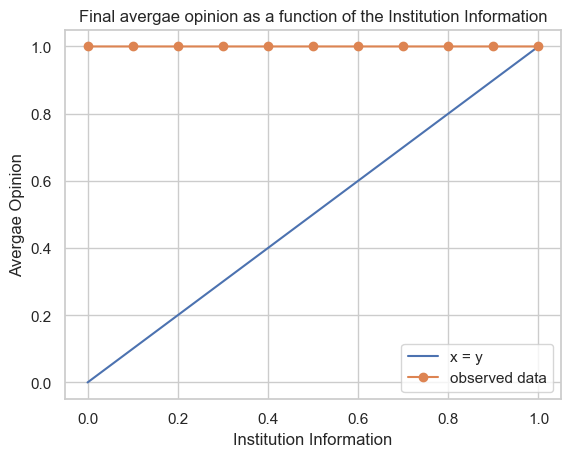

In [72]:
x = np.arange(0.0, 1.1, 0.1)

# Documented data
x2 = list(avg_opinions['inst_info'])
y2 = list(avg_opinions['op_avg'])

plt.plot(x, x, label='x = y')
plt.plot(x2, y2, label='observed data', marker='o')

plt.xlabel('Institution Information')
plt.ylabel('Avergae Opinion')
plt.title('Final avergae opinion as a function of the Institution Information')

plt.legend()
plt.show()

# Stage 3. Extendeding the simple OD model incrementally

All the versions will have the following things in common:
- Network type: random network
- Population size: 1000 agents
- Stopping condition: 
    - reaching convergence (all agents have the same opinion/state) 
    - or the opinions are no longer changing, or the change doesn’t exceed a specific threshold
- Measured output: 
    - convergence speed
    - overall average opinion over time steps 

The model will be extended incrementelly as follows:

Phase 1:
- 1. Simple OD model with continuous opinion + no update probability  

Phase 2:
- 1. Extended OD model with P + always update opinion 
- 2. Extended OD model with R + always update opinion
- 3. Extended OD model with P and R + always update opinion 

Phase 3:
- 1. Extended OD model with P + update opinion based on B
- 2. Extended OD model with R + update opinion based on B
- 3. Extended OD model with P and R + update opinion based on B

Phase 4:
Introduce institutional Information 


## Phase 1) Original Simple model 

First I want ot get a clear idea of how the internal variables are being intialized and distributed (making sure that they follow unifoem distribution). 

(I noticed that as I increase the population size the distribution gets more and more uniform)

- **Population size:** 1000
- **opinion update method :** DeGroot (the new opinion is the average of the neighbours opinions)
- **Network :** Random Graph (avg node degree = 5)
- **Changes :** Continous opinions insteade of binary
- **Model output:** average opinion + simulation duration

In [53]:
model = opinionsModel(N = 2000, avg_node_degree = 5, update_opinion_prob = 0.5)

In [54]:
model_data0 = model.datacollector.get_model_vars_dataframe()
agents_data0 = model.datacollector.get_agent_vars_dataframe()

#### First I am plotting the ditribution of the agent's internal variables, making sure that they are uniformly distributed

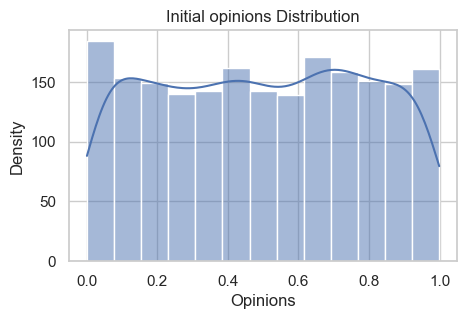

In [55]:
plt.figure(figsize=(5,  3))
sns.histplot(agents_data0.query('Step == 0')['opinion'], kde=True)
plt.title('Initial opinions Distribution')
plt.xlabel('Opinions')
plt.ylabel('Density')
plt.show()

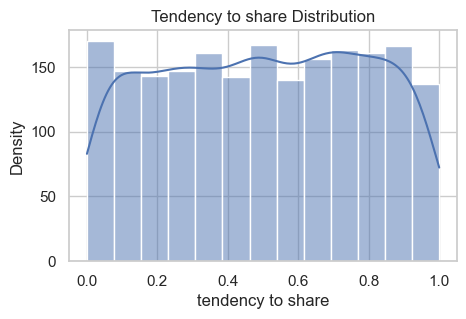

In [56]:
plt.figure(figsize=(5,  3))
sns.histplot(agents_data0.query('Step == 0')['tendency_to_share'], kde=True)
plt.title('Tendency to share Distribution')
plt.xlabel('tendency to share')
plt.ylabel('Density')
plt.show()

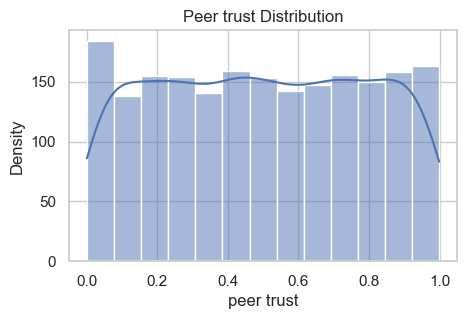

In [57]:
plt.figure(figsize=(5,  3))
sns.histplot(agents_data0.query('Step == 0')['peer_trust'], kde=True)
plt.title('Peer trust Distribution')
plt.xlabel('peer trust')
plt.ylabel('Density')
plt.show()

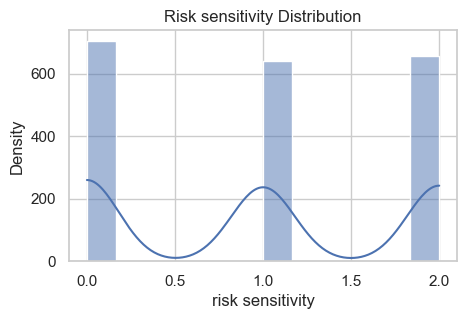

In [58]:
plt.figure(figsize=(5,  3))
sns.histplot(agents_data0.query('Step == 0')['risk_sensitivity'], kde=True)
plt.title('Risk sensitivity Distribution')
plt.xlabel('risk sensitivity')
plt.ylabel('Density')
plt.show()

#### Run the model

Now I am running the simulation until the model reaches the stopping condition

In [59]:
while (True):
    prev_avg = opinion_avg(model)
    model.step()
    new_avg = opinion_avg(model)
    
    if abs(new_avg - prev_avg) < 0.000001:
        break


In [60]:
model_data = model.datacollector.get_model_vars_dataframe()
agents_data = model.datacollector.get_agent_vars_dataframe()

#### Visualize the model output:

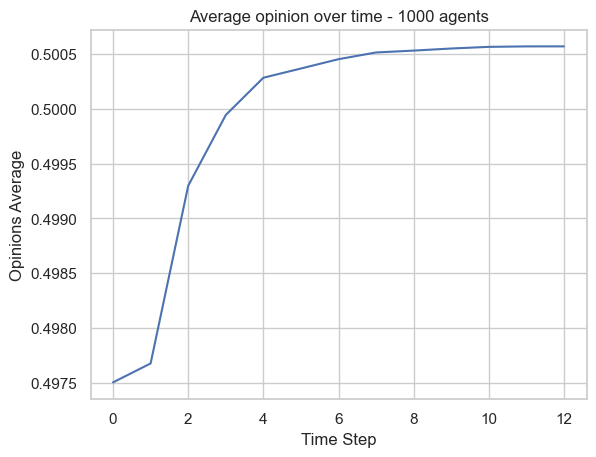

In [64]:
sns.lineplot(x=[i for i in range(len(model_data))], y="op_avg", data = model_data)

plt.title('Average opinion over time - 1000 agents')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

Here the average opinion is increasing from 4.9 to 5 over 12 time steps 

Statistics for 1 iteration:
- convergenince speed = 12  
- final avg op = 5
- avg op diff =  0.1

#### The opinion over time for single agents:

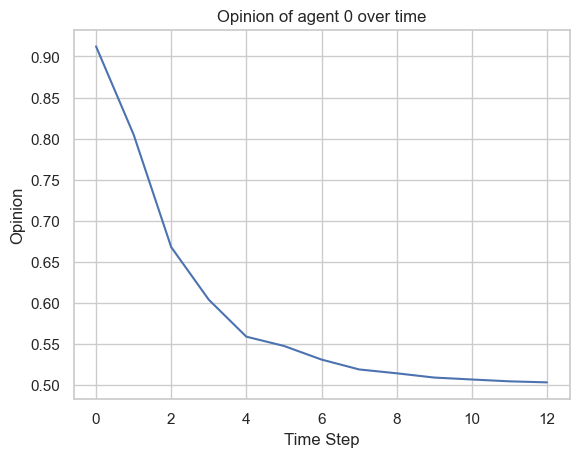

In [62]:
sns.lineplot(x='Step', y="opinion", data = agents_data.query('AgentID == 0'))

plt.title('Opinion of agent 0 over time')
plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

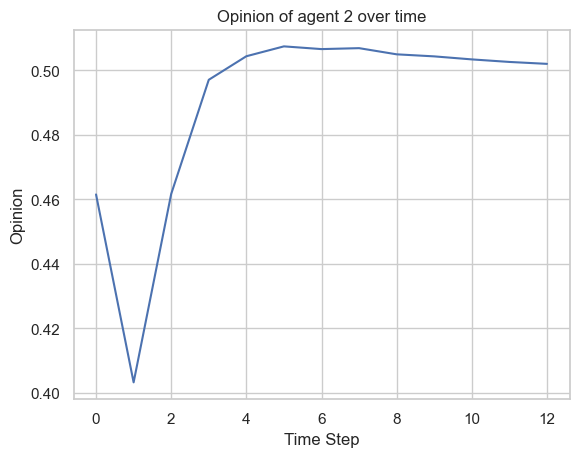

In [63]:
sns.lineplot(x='Step', y="opinion", data = agents_data.query('AgentID == 2'))

plt.title('Opinion of agent 2 over time')
plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

### Batchrun

Now I am running the model using a batchrun (multiple iterations and taking the average)
Because  of the stochastic nature of ABM, this will help getting a more accurate representation of the model behavior. 

Here is the result for a random network of 1000 agents (avg node = 5) and 1000 iterations (instead of 2000 becasue it takes too long) -> this configuration will be used for all the other batchruns of the other cases that I will be testing

In [66]:
params = {
    "N": 1000,  
    "avg_node_degree" : 5,
}

results = mesa.batch_run(
    opinionsModel,
    parameters = params,
    iterations = 1000,  # Number of model runs per parameter combination
    max_steps = 100,  # Maximum number of steps per model run
    number_processes = 1,
    display_progress = True,
)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|███████████████████████████████████████| 1000/1000 [04:10<00:00,  3.99it/s]


In [67]:
# results_df = pd.DataFrame(results)
# results_df.to_csv("Results/V03.0_Simple_OD(2).csv", index=False)

The following code is when I was including "opinion update probabilty" , and so I plotted the opinion avergae accross different uopdate probabilies. The results is showing that :
- final avegare is almost the same for different values from 0.0 to 1.0 .. which means the opinion update probabilty has no noticeable effect on the opinion average.  
- For the convergence speed: the higher the update probability is -> the faster the model converge. This is predictabl. 

In [72]:
# Don't write-over this file
df = pd.read_csv('Results/V03.0_Simple_OD.csv')

In [73]:
filtered_df = df[['iteration', 'Step','update_opinion_prob', 'op_avg']]

In [74]:
filtered_df = filtered_df.drop_duplicates(subset=['iteration', 'Step','update_opinion_prob', 'op_avg'], keep='last')

In [75]:
new_df = pd.DataFrame(filtered_df.groupby('update_opinion_prob')[['op_avg', 'Step']].mean())

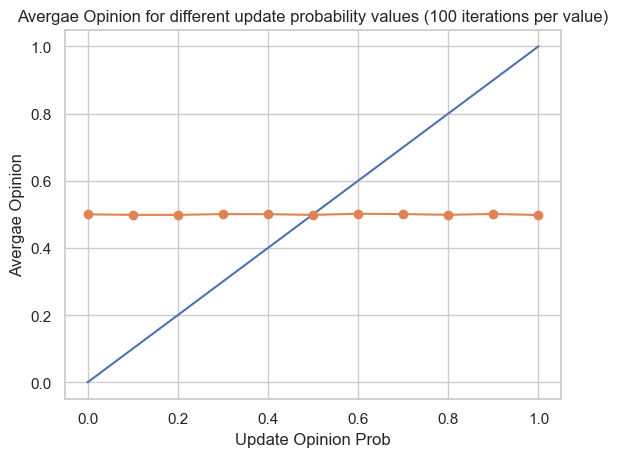

In [76]:
x = np.arange(0.0, 1.1, 0.1)

# Documented data
x2 = list(new_df.index)
y2 = list(new_df['op_avg'])

plt.plot(x, x, label='x = y')
plt.plot(x2, y2, marker='o')

plt.title("Avergae Opinion for different update probability values (100 iterations per value)")
plt.xlabel('Update Opinion Prob')
plt.ylabel('Avergae Opinion')

plt.show()

the avergae opinion at the end of simulation kind of the same for all casses (approximatly 0.5) -> no significant influence of the update probabilyt on the final model output

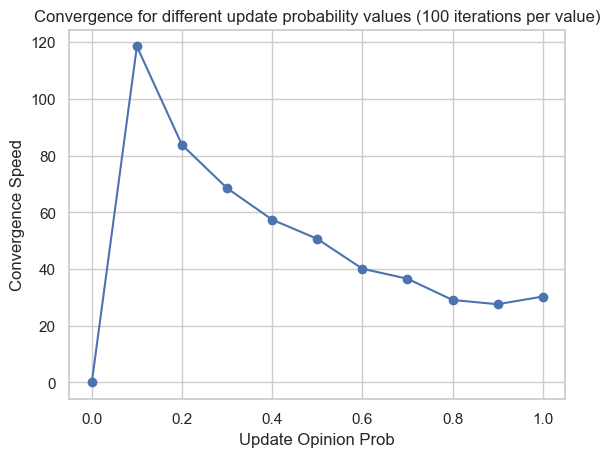

In [131]:
x = np.arange(0.0, 1.1, 0.1)

# Documented data
x2 = list(new_df.index)
y2 = list(new_df['Step'])

# plt.plot(x, x, label='x = y')
plt.plot(x2, y2, marker='o')

plt.title("Convergence for different update probability values (100 iterations per value)")

plt.xlabel('Update Opinion Prob')
plt.ylabel('Convergence Speed')

plt.show()

similar to the first figure, the model takes longer time to converge as the opinion update probability holds smaller values. When the probabilty is 0, the model will stop immediatly as all agents will not update their opinions and therefore the average will not change acrross time steps (which means the model in stable state and there is no dynamic happening)

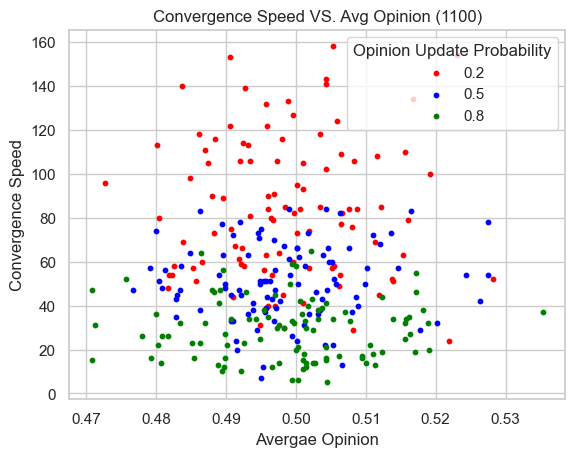

In [152]:
x = np.arange(0.0, 1.1, 0.1)

# Documented data
x = list(filtered_df.query('update_opinion_prob == 0.2')['op_avg'])
y = list(filtered_df.query('update_opinion_prob == 0.2')['Step'])
plt.scatter(x, y, marker='o', color = "red" , s = 10, label = "0.2")

x2 = list(filtered_df.query('update_opinion_prob == 0.5')['op_avg'])
y2 = list(filtered_df.query('update_opinion_prob == 0.5')['Step'])
plt.scatter(x2, y2, marker='o', color = "blue", s = 10, label = "0.5")

x2 = list(filtered_df.query('update_opinion_prob == 0.8')['op_avg'])
y2 = list(filtered_df.query('update_opinion_prob == 0.8')['Step'])
plt.scatter(x2, y2, marker='o', color = "green", s = 10, label = "0.8")

plt.title("Convergence Speed VS. Avg Opinion (1100)")
plt.legend(title="Opinion Update Probability")
plt.xlabel('Avergae Opinion')
plt.ylabel('Convergence Speed')

plt.show()

The above figure shows the distribution of simuilation length and the final average opinions for all the iterations, categorized based on the update probabilty (high, low, medium). is it predicteble that lower probabilty values takes longer simulations. As for the value of the average opinions -> seems like the disstibution is kind of similar for all values. 

#### So based on that .. I decided to ignore the update probabilty in further implementations

### No opinion update probability

 - result for a network of 1000 agents
 - 1000 iterations 
 - avg node = 5
 - no update probabilty
 - stopping condition: new_avg - prev_avg < 0.000001

In [3]:
params = {
    "N": 1000,  
    "avg_node_degree" : 5,
}

results = mesa.batch_run(
    opinionsModel,
    parameters = params,
    iterations = 1000,  # Number of model runs per parameter combination
    max_steps = 100,  # Maximum number of steps per model run
    number_processes = 1,
    display_progress = True,
)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|███████████████████████████████████████| 1000/1000 [04:06<00:00,  4.06it/s]


In [4]:
results_df = pd.DataFrame(results)
results_df.to_csv("Results/V03.0_Simple_OD(no_update_prob).csv", index=False)

In [56]:
df = pd.read_csv('Results/V03.0_Simple_OD(no_update_prob).csv')

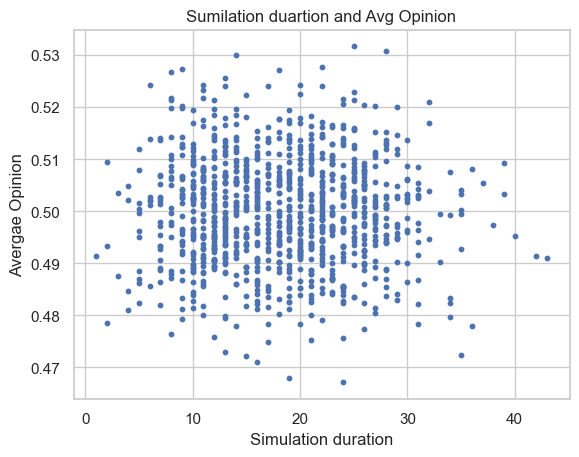

In [57]:
x = list(df['Step'])
y = list(df['op_avg'])

plt.scatter(x, y, marker='o', s=10)

plt.title("Sumilation duartion and Avg Opinion")
plt.xlabel('Simulation duration')
plt.ylabel('Avergae Opinion')


plt.show()

Here I am running 1000 simulations, but this time without the opinion update probability. and I am plotting the distibution the final average opinion and the simmulation duration. The plot shows the same opinion average range (0.47 - 0.53) and the longest simulation duration is less than 50 time steps.

### Visualize the opinion dynamics over time

I am runngin another batchrun script because I need to record the data at each time step to visualize the dynamics (data collection persiod = 1), and I am setting the max steps based on the previos result i got for the longest smulation duration. 

In [7]:
params = {
    "N": 1000,  
    "avg_node_degree" : 5,
}

results = mesa.batch_run(
    opinionsModel,
    parameters = params,
    iterations = 1000,  # Number of model runs per parameter combination
    max_steps = 100,  # Maximum number of steps per model run
    number_processes = 1,
    data_collection_period = 1,
    display_progress = True,
)

100%|███████████████████████████████████████| 1000/1000 [04:03<00:00,  4.11it/s]


In [9]:
results_df = pd.DataFrame(results)
results_df.to_csv("Results/V03.1_Simple_OD_Dynamics(2).csv", index=False)

In [76]:
df2 = pd.read_csv('Results/V03.1_Simple_OD_Dynamics(2).csv')

In [77]:
new_df = df2[['iteration', 'Step' , 'op_avg']]
max_steps = new_df.groupby('iteration')['Step'].count().max()

extra_rows = []
for iteration, group in new_df.groupby('iteration'):
    current_steps = group['Step'].max()
    if current_steps < max_steps:
        last_op_avg = group['op_avg'].iloc[-1]
        extra_rows.extend([(iteration, step, last_op_avg) for step in range(current_steps + 1, max_steps + 1)])

extra_df = pd.DataFrame(extra_rows, columns=['iteration', 'Step', 'op_avg'])
new_df = pd.concat([new_df, extra_df])

mean_df = pd.DataFrame(new_df.groupby('Step')['op_avg'].mean())

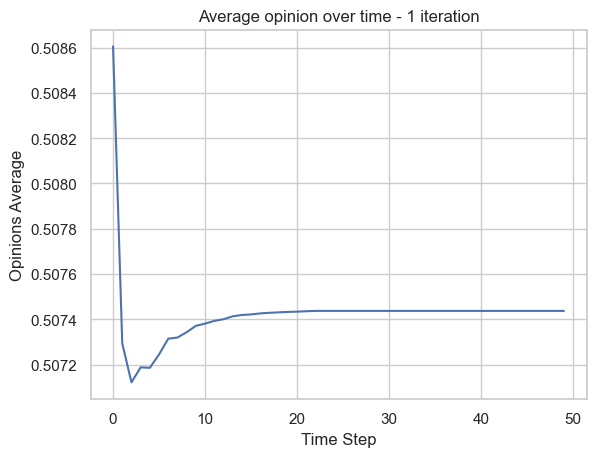

In [78]:
sns.lineplot(x="Step", y="op_avg", data = new_df.query('iteration == 0'))

plt.title('Average opinion over time - 1 iteration')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

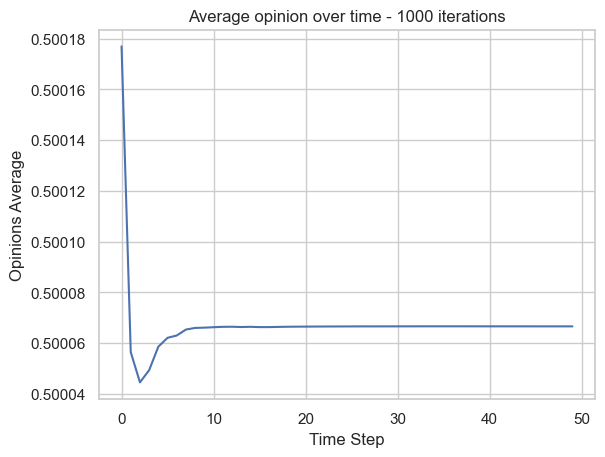

In [79]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

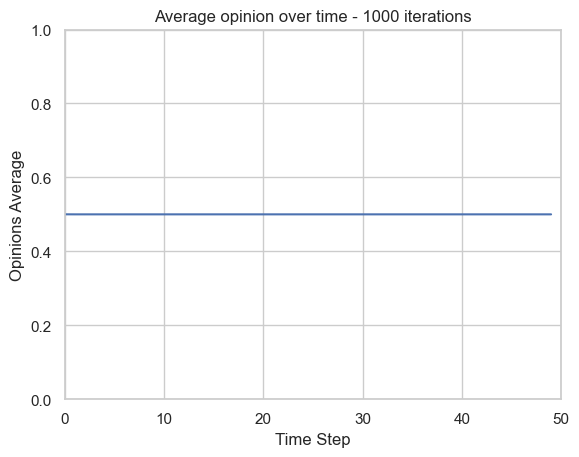

In [81]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")

plt.xlim(0, 50)
plt.ylim(0,1)

plt.show()

## Phase 2) Simple G&V model with only peer trust

- **Population size:** 1000
- **opinion update method :** Deﬀuant model 
- **Network :** Random Graph (avg node degree = 5)
- **Changes :** select a sinlge nighbor at random to engage in peer-to-peer communication + different update method + I had to change the stopping condition to (< 0.00001)
- **Model output:** average opinion + simulation duration

In [3]:
model = opinionsModel(N = 1000, avg_node_degree = 5)

#### Run the model

In [4]:
while (True):
    prev_avg = opinion_avg(model)
    model.step()
    new_avg = opinion_avg(model)
    
    if abs(new_avg - prev_avg) < 0.00001:
        break


In [5]:
model_data = model.datacollector.get_model_vars_dataframe()
# agents_data = model.datacollector.get_agent_vars_dataframe()

#### Visualize the model output:

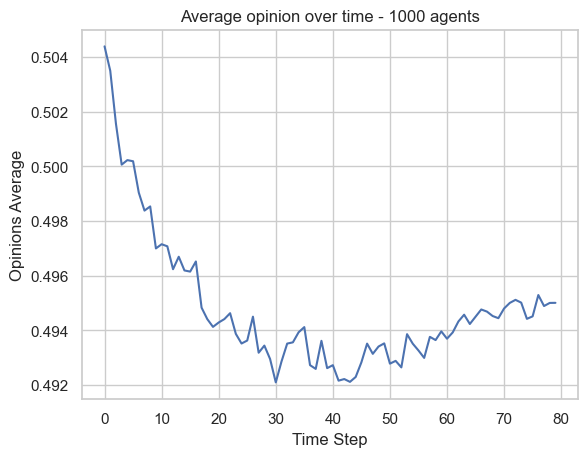

In [6]:
sns.lineplot(x=[i for i in range(len(model_data))], y="op_avg", data = model_data)

plt.title('Average opinion over time - 1000 agents')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

More alternation over time

In [8]:
# sns.lineplot(x='Step', y="opinion", data = agents_data.query('AgentID == 0'))

# plt.title('Opinion of agent 0 over time')
# plt.xlabel("Time Step")
# plt.ylabel("Opinion")
# plt.show()

### Batch run

In [7]:
params = {
    "N": 1000,  
    "avg_node_degree" : 5,
}

results = mesa.batch_run(
    opinionsModel,
    parameters = params,
    iterations = 1000,  # Number of model runs per parameter combination
    max_steps = 500,  # Maximum number of steps per model run
    number_processes = 1,
    data_collection_period = 1,
    display_progress = True,
)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|███████████████████████████████████████| 1000/1000 [11:36<00:00,  1.44it/s]


In [14]:
results_df = pd.DataFrame(results)
results_df.to_csv("Results/V03.2_simple_GV.csv", index=False)

In [82]:
df = pd.read_csv('Results/V03.2_simple_GV.csv')

In [83]:
new_df = df.groupby('iteration').last().reset_index()

In [1]:
x = list(new_df['Step'])
y = list(new_df['op_avg'])

plt.scatter(x, y, marker='o', s=10)

plt.title("Sumilation duartion and Avg Opinion")
plt.xlabel('Simulation duration')
plt.ylabel('Avergae Opinion')


plt.show()

NameError: name 'new_df' is not defined

- The model needs more time to reach convergence
- It seems some iteration longer more than 500 steps to coverge, that's why the avg op at time 500 is more distributed

### Visualize the opinion dynamics over time

In [18]:
# params = {
#     "N": 1000,  
#     "avg_node_degree" : 5,
# }

# results = mesa.batch_run(
#     opinionsModel,
#     parameters = params,
#     iterations = 100,  # Number of model runs per parameter combination
#     max_steps = 500,  # Maximum number of steps per model run
#     number_processes = 1,
#     data_collection_period = 1,
#     display_progress = True,
# )

In [5]:
# results_df = pd.DataFrame(results)
# results_df.to_csv("Results/V03.3_Another_OD_Dynamics.csv", index=False)

In [6]:
# df2 = pd.read_csv('Results/V03.3_Another_OD_Dynamics.csv')
# new_df2 = pd.DataFrame(df2.groupby('Step')['op_avg'].mean())

In [85]:
new_df = df[['iteration', 'Step' , 'op_avg']]
max_steps = new_df.groupby('iteration')['Step'].count().max()

extra_rows = []
for iteration, group in new_df.groupby('iteration'):
    current_steps = group['Step'].max()
    if current_steps < max_steps:
        last_op_avg = group['op_avg'].iloc[-1]
        extra_rows.extend([(iteration, step, last_op_avg) for step in range(current_steps + 1, max_steps + 1)])

extra_df = pd.DataFrame(extra_rows, columns=['iteration', 'Step', 'op_avg'])
new_df = pd.concat([new_df, extra_df])

mean_df = pd.DataFrame(new_df.groupby('Step')['op_avg'].mean())

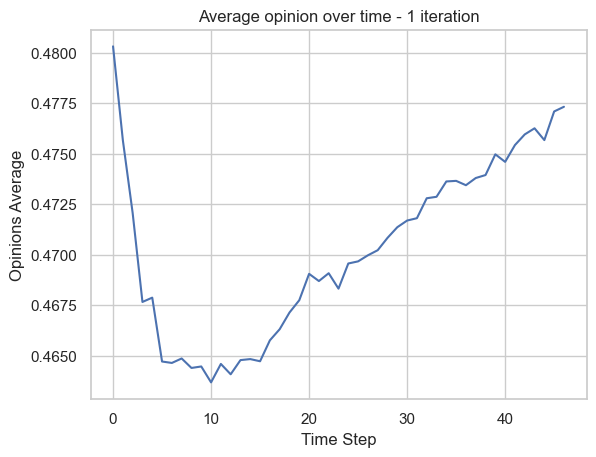

In [86]:
sns.lineplot(x="Step", y="op_avg", data = df.query('iteration == 0'))

plt.title('Average opinion over time - 1 iteration')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

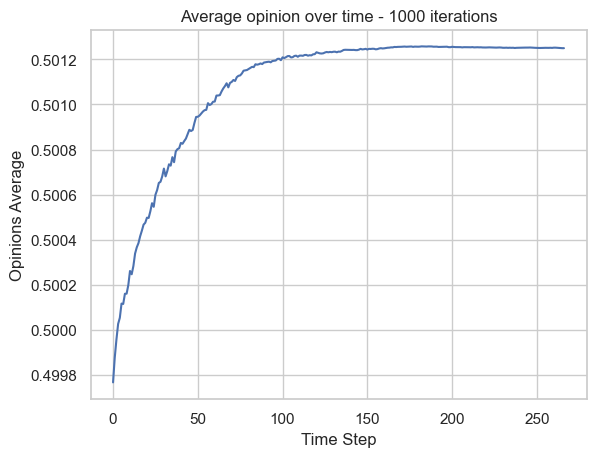

In [87]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

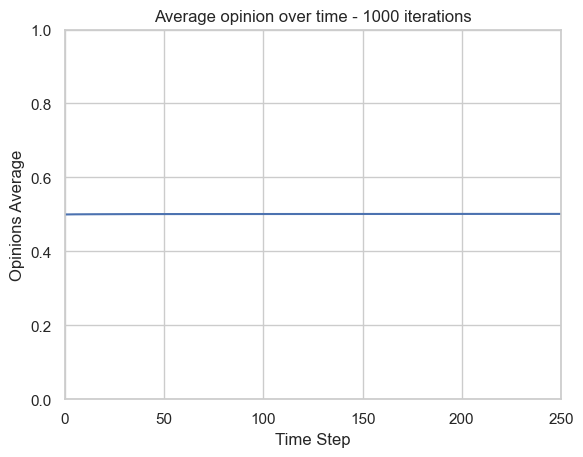

In [89]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")

plt.xlim(0, 250)
plt.ylim(0,1)

plt.show()

## Phase 3) G&V model with peer trust and risk sensitivity

- **Population size:** 1000
- **opinion update method :** Deﬀuant model + risk sensitivity step
- **Network :** Random Graph (avg node degree = 5)
- **Changes :** update the opinion further according to risk senitivty
- **Model output:** average opinion + simulation duration


In [3]:
model = opinionsModel(N = 1000, avg_node_degree = 5)

#### Run the model

In [4]:
while (True):
    prev_avg = opinion_avg(model)
    model.step()
    new_avg = opinion_avg(model)
    
    if abs(new_avg - prev_avg) < 0.00001:
        break


In [5]:
model_data = model.datacollector.get_model_vars_dataframe()
# agents_data = model.datacollector.get_agent_vars_dataframe()

#### Visualize the model output:

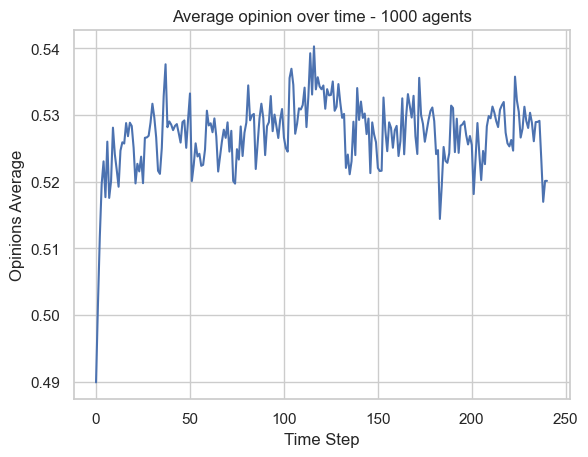

In [6]:
sns.lineplot(x=[i for i in range(len(model_data))], y="op_avg", data = model_data)

plt.title('Average opinion over time - 1000 agents')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

In [8]:
# sns.lineplot(x='Step', y="opinion", data = agents_data.query('AgentID == 0'))

# plt.title('Opinion of agent 0 over time')
# plt.xlabel("Time Step")
# plt.ylabel("Opinion")
# plt.show()

### Batch run

In [10]:
params = {
    "N": 1000,  
    "avg_node_degree" : 5,
}

results = mesa.batch_run(
    opinionsModel,
    parameters = params,
    iterations = 1000,  # Number of model runs per parameter combination
    max_steps = 700,  # Maximum number of steps per model run
    number_processes = 1,
    data_collection_period = 1,
    display_progress = True,
)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|█████████████████████████████████████| 1000/1000 [5:32:41<00:00, 19.96s/it]


In [11]:
results_df = pd.DataFrame(results)
results_df.to_csv("Results/V03.4_GV_with_risk.csv", index=False)

In [90]:
df = pd.read_csv('Results/V03.4_GV_with_risk.csv')

In [91]:
new_df = df.groupby('iteration').last().reset_index()

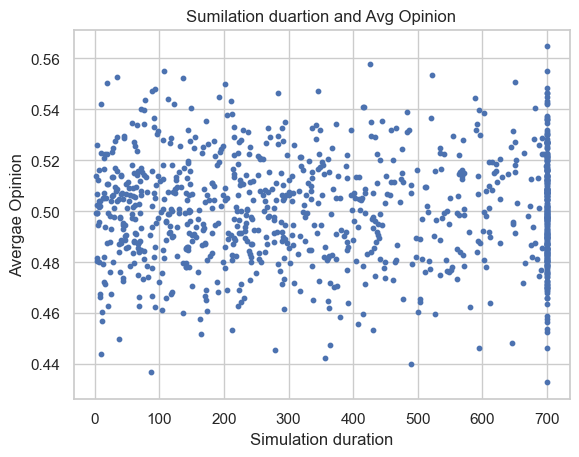

In [92]:
x = list(new_df['Step'])
y = list(new_df['op_avg'])

plt.scatter(x, y, marker='o', s=10)

plt.title("Sumilation duartion and Avg Opinion")
plt.xlabel('Simulation duration')
plt.ylabel('Avergae Opinion')


plt.show()

- Seems like a lot of iterations needs more than 700 step to stabelise

In [93]:
new_df.query('Step < 700').shape[0]

749

In [94]:
new_df.query('Step == 700').shape[0]

251

only 251 iterations reached 700 steps .. and it is porpably didn't reach its final state, so I will ignore these iterations

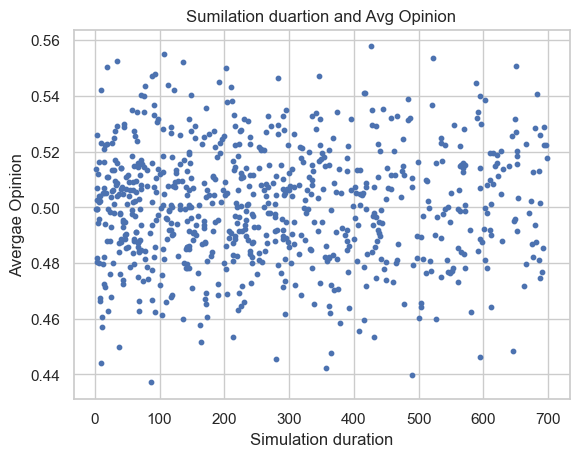

In [95]:
filtered_df = new_df.query('Step < 700')

x = list(filtered_df['Step'])
y = list(filtered_df['op_avg'])

plt.scatter(x, y, marker='o', s=10)

plt.title("Sumilation duartion and Avg Opinion")
plt.xlabel('Simulation duration')
plt.ylabel('Avergae Opinion')

plt.show()

### Visualize the opinion dynamics over time

In [96]:
# params = {
#     "N": 1000,  
#     "avg_node_degree" : 5,
# }

# results = mesa.batch_run(
#     opinionsModel,
#     parameters = params,
#     iterations = 100,  # Number of model runs per parameter combination
#     max_steps = 1000,  # Maximum number of steps per model run
#     number_processes = 1,
#     data_collection_period = 1,
#     display_progress = True,
# )

In [97]:
# results_df = pd.DataFrame(results)
# results_df.to_csv("Results/V03.5_Another_OD_with_risk_Dynamics.csv", index=False)

In [98]:
# df2 = pd.read_csv('Results/V03.5_Another_OD_with_risk_Dynamics.csv')

In [99]:
new_df = df[['iteration', 'Step' , 'op_avg']]
max_steps = new_df.groupby('iteration')['Step'].count().max()

extra_rows = []
for iteration, group in new_df.groupby('iteration'):
    current_steps = group['Step'].max()
    if current_steps < max_steps:
        last_op_avg = group['op_avg'].iloc[-1]
        extra_rows.extend([(iteration, step, last_op_avg) for step in range(current_steps + 1, max_steps + 1)])

extra_df = pd.DataFrame(extra_rows, columns=['iteration', 'Step', 'op_avg'])
new_df = pd.concat([new_df, extra_df])

mean_df = pd.DataFrame(new_df.groupby('Step')['op_avg'].mean())

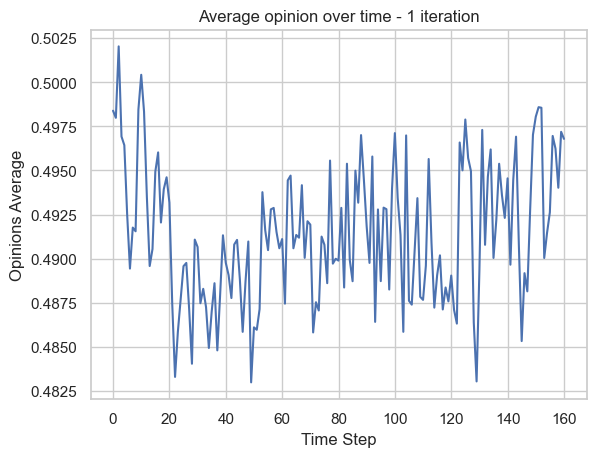

In [100]:
sns.lineplot(x="Step", y="op_avg", data = df.query('iteration == 0'))

plt.title('Average opinion over time - 1 iteration')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

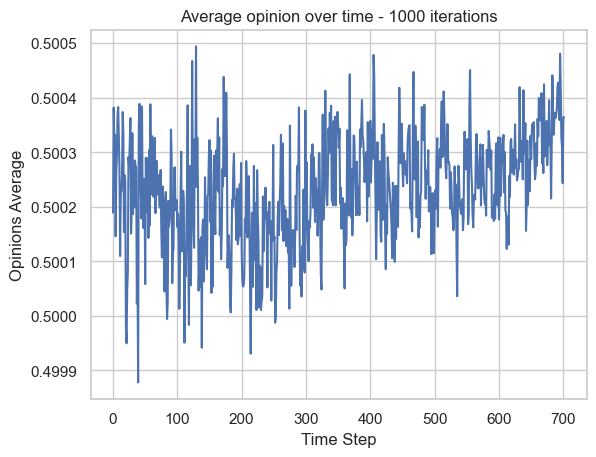

In [101]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")

plt.show()

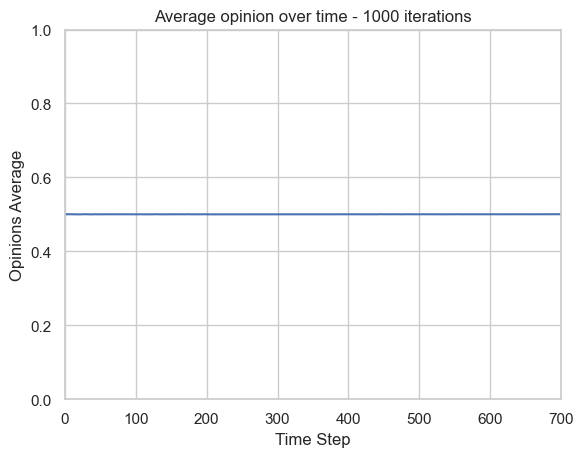

In [102]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")

plt.xlim(0, 700)
plt.ylim(0,1)

plt.show()

## Phase 4) G&V model with peer trust and risk sensitivity and tendency to share

- **Population size:** 1000
- **opinion update method :** Deﬀuant model 
- **Network :** Random Graph (avg node degree = 5)
- **Changes :** update only based on tendency to share
- **Model output:** average opinion + simulation duration


In [11]:
model = opinionsModel(N = 1000, avg_node_degree = 5)

#### Run the model

In [12]:
while (True):
    prev_avg = opinion_avg(model)
    model.step()
    new_avg = opinion_avg(model)
    
    if abs(new_avg - prev_avg) < 0.00001:
        break


In [13]:
model_data = model.datacollector.get_model_vars_dataframe()

#### Visualize the model output:

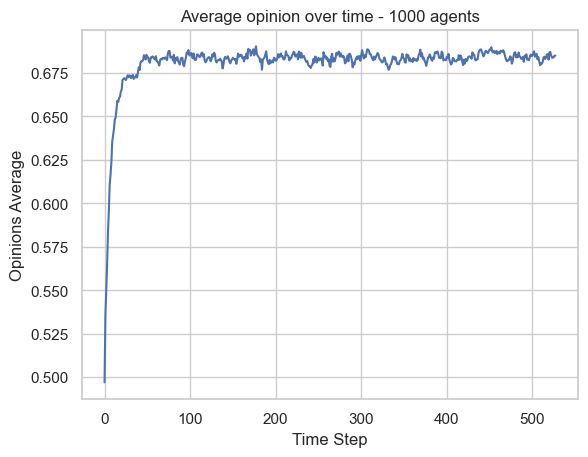

In [14]:
sns.lineplot(x=[i for i in range(len(model_data))], y="op_avg", data = model_data)

plt.title('Average opinion over time - 1000 agents')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

### Batch run

In [15]:
params = {
    "N": 1000,  
    "avg_node_degree" : 5,
}

results = mesa.batch_run(
    opinionsModel,
    parameters = params,
    iterations = 1000,  # Number of model runs per parameter combination
    max_steps = 700,  # Maximum number of steps per model run
    number_processes = 1,
    data_collection_period = 1,
    display_progress = True,
)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|███████████████████████████████████████| 1000/1000 [49:41<00:00,  2.98s/it]


In [16]:
results_df = pd.DataFrame(results)
results_df.to_csv("Results/V03.5_GV_with_R_and_B.csv", index=False)

In [12]:
df = pd.read_csv('Results/V03.5_GV_with_R_and_B.csv')

In [13]:
new_df = df.groupby('iteration').last().reset_index()

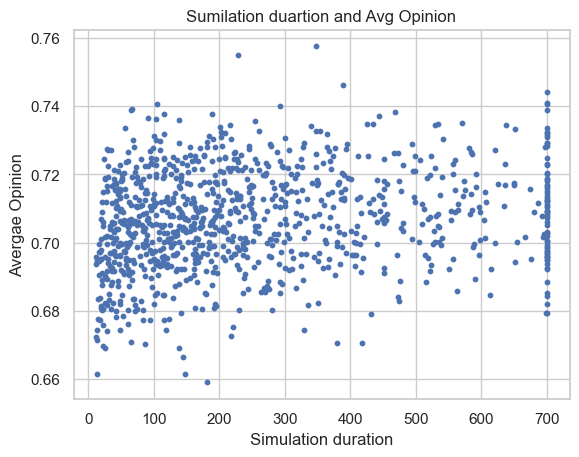

In [14]:
new_df = df.groupby('iteration').last().reset_index()

x = list(new_df['Step'])
y = list(new_df['op_avg'])

plt.scatter(x, y, marker='o', s=10)

plt.title("Sumilation duartion and Avg Opinion")
plt.xlabel('Simulation duration')
plt.ylabel('Avergae Opinion')


plt.show()

- also here lot of iterations needs more than 700 step to stabelise
- the final average opinion has increased compared to prev cases

In [15]:
new_df.query('Step < 700').shape[0]

934

In [16]:
new_df.query('Step == 700').shape[0]

66

only 66 iterations reached 700 steps .. and it is porpably didn't reach its final state, so I will ignore these iterations

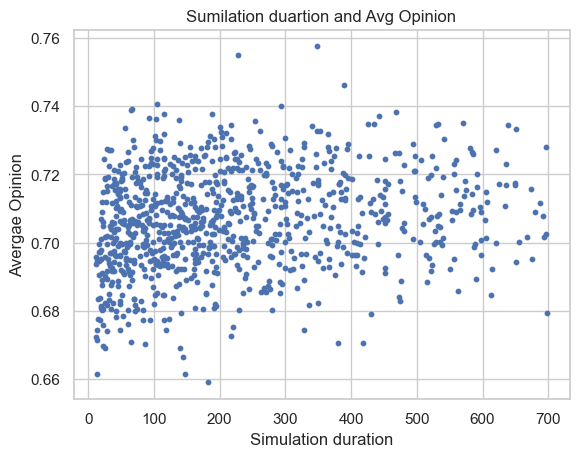

In [17]:
filtered_df = new_df.query('Step < 700')

x = list(filtered_df['Step'])
y = list(filtered_df['op_avg'])

plt.scatter(x, y, marker='o', s=10)

plt.title("Sumilation duartion and Avg Opinion")
plt.xlabel('Simulation duration')
plt.ylabel('Avergae Opinion')

plt.show()

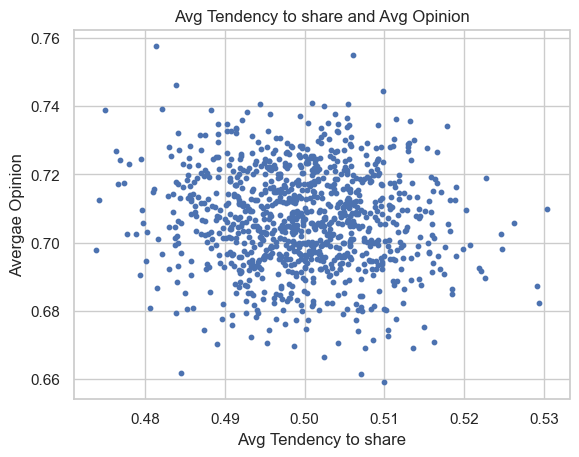

In [19]:
x = list(new_df['tendency_to_share_avg'])
y = list(new_df['op_avg'])

plt.scatter(x, y, marker='o', s=10)

plt.title("Avg Tendency to share and Avg Opinion")
plt.xlabel('Avg Tendency to share')
plt.ylabel('Avergae Opinion')


plt.show()

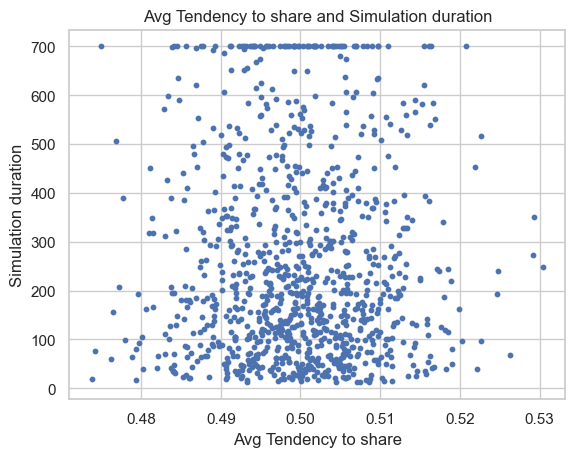

In [20]:
x = list(new_df['tendency_to_share_avg'])
y = list(new_df['Step'])

plt.scatter(x, y, marker='o', s=10)

plt.title("Avg Tendency to share and Simulation duration")
plt.xlabel('Avg Tendency to share')
plt.ylabel('Simulation duration')


plt.show()

### Visualize the opinion dynamics over time

In [35]:
new_df = df[['iteration', 'Step' , 'op_avg']]
max_steps = new_df.groupby('iteration')['Step'].count().max()

extra_rows = []
for iteration, group in new_df.groupby('iteration'):
    current_steps = group['Step'].max()
    if current_steps < max_steps:
        last_op_avg = group['op_avg'].iloc[-1]
        extra_rows.extend([(iteration, step, last_op_avg) for step in range(current_steps + 1, max_steps + 1)])

extra_df = pd.DataFrame(extra_rows, columns=['iteration', 'Step', 'op_avg'])
new_df = pd.concat([new_df, extra_df])

mean_df = pd.DataFrame(new_df.groupby('Step')['op_avg'].mean())

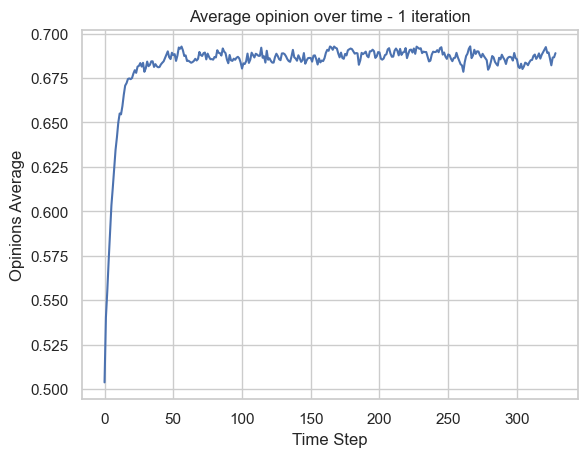

In [36]:
sns.lineplot(x="Step", y="op_avg", data = df.query('iteration == 0'))

plt.title('Average opinion over time - 1 iteration')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

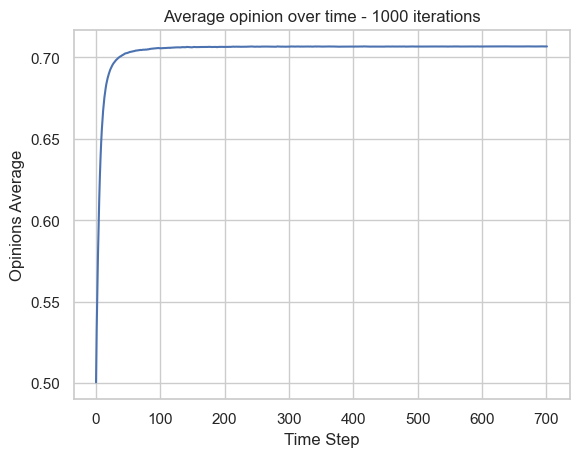

In [37]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")

plt.show()

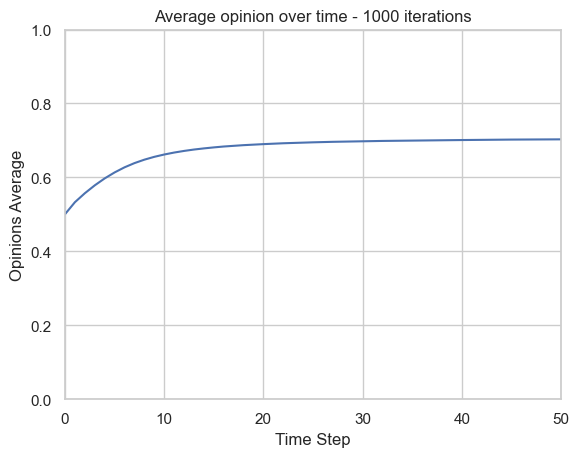

In [38]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")

plt.xlim(0, 50)
plt.ylim(0,1)

plt.show()

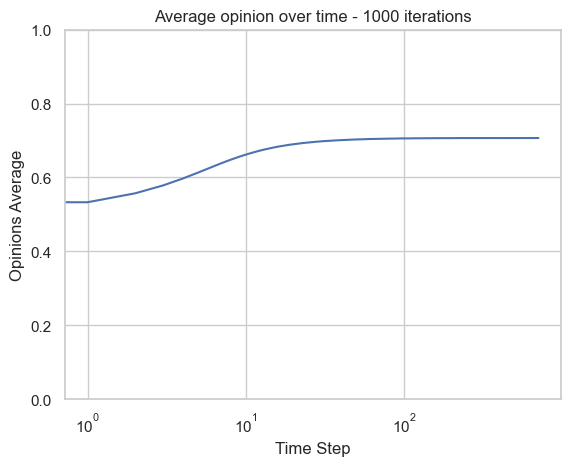

In [39]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")

plt.ylim(0,1)
plt.xscale('log')

plt.show()

## Phase 5) G&V model with the C code implementation

- **Population size:** 1000
- **opinion update method :** Deﬀuant model 
- **Network :** Random Graph (avg node degree = 5)
- **Changes :** update opinion using the function that matches the C code file
- **Model output:** average opinion + simulation duration


In [11]:
model = opinionsModel(N = 1000, avg_node_degree = 5)

#### Run the model

In [12]:
while (True):
    prev_avg = opinion_avg(model)
    model.step()
    new_avg = opinion_avg(model)
    
    if abs(new_avg - prev_avg) < 0.00001:
        break


In [13]:
model_data = model.datacollector.get_model_vars_dataframe()

#### Visualize the model output:

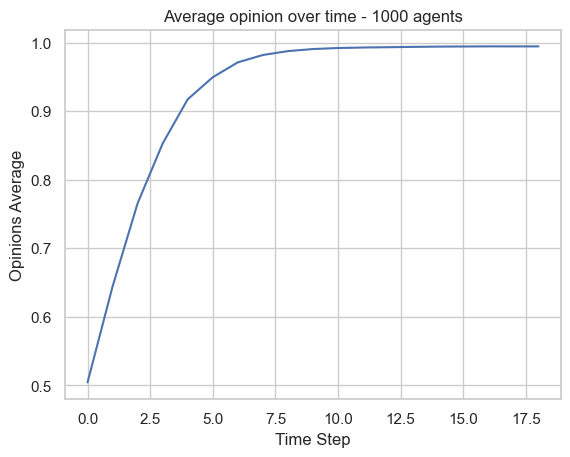

In [14]:
sns.lineplot(x=[i for i in range(len(model_data))], y="op_avg", data = model_data)

plt.title('Average opinion over time - 1000 agents')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

### Batch run

In [15]:
params = {
    "N": 1000,  
    "avg_node_degree" : 5,
}

results = mesa.batch_run(
    opinionsModel,
    parameters = params,
    iterations = 1000,  # Number of model runs per parameter combination
    max_steps = 500,  # Maximum number of steps per model run
    number_processes = 1,
    data_collection_period = 1,
    display_progress = True,
)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|███████████████████████████████████████| 1000/1000 [05:34<00:00,  2.99it/s]


In [16]:
results_df = pd.DataFrame(results)
results_df.to_csv("Results/V03.6_GV_communicate_function.csv", index=False)

In [17]:
df = pd.read_csv('Results/V03.6_GV_communicate_function.csv')

In [18]:
new_df = df.groupby('iteration').last().reset_index()

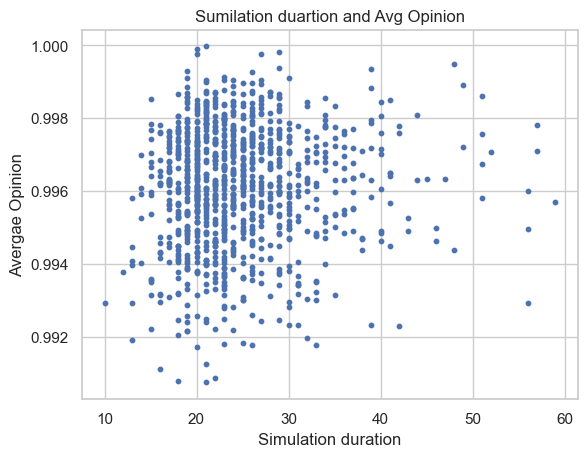

In [19]:

x = list(new_df['Step'])
y = list(new_df['op_avg'])

plt.scatter(x, y, marker='o', s=10)

plt.title("Sumilation duartion and Avg Opinion")
plt.xlabel('Simulation duration')
plt.ylabel('Avergae Opinion')


plt.show()

### Visualize the opinion dynamics over time

In [20]:
new_df = df[['iteration', 'Step' , 'op_avg']]
max_steps = new_df.groupby('iteration')['Step'].count().max()

extra_rows = []
for iteration, group in new_df.groupby('iteration'):
    current_steps = group['Step'].max()
    if current_steps < max_steps:
        last_op_avg = group['op_avg'].iloc[-1]
        extra_rows.extend([(iteration, step, last_op_avg) for step in range(current_steps + 1, max_steps + 1)])

extra_df = pd.DataFrame(extra_rows, columns=['iteration', 'Step', 'op_avg'])
new_df = pd.concat([new_df, extra_df])

mean_df = pd.DataFrame(new_df.groupby('Step')['op_avg'].mean())

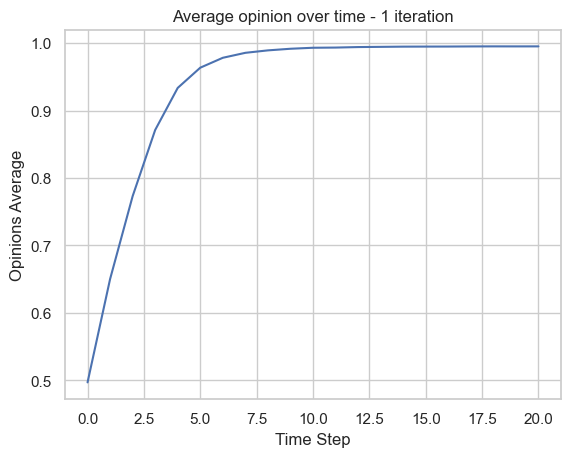

In [21]:
sns.lineplot(x="Step", y="op_avg", data = df.query('iteration == 0'))

plt.title('Average opinion over time - 1 iteration')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

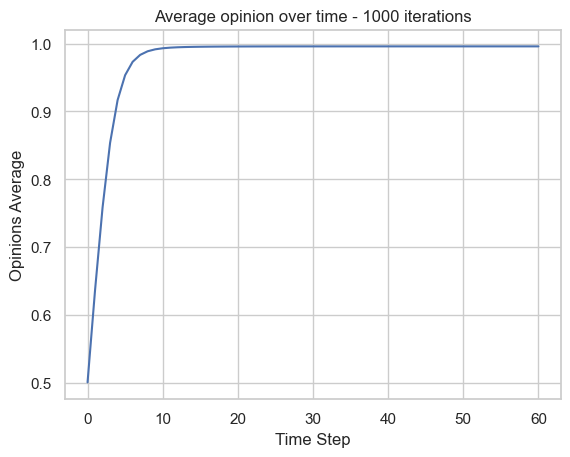

In [22]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")

plt.show()

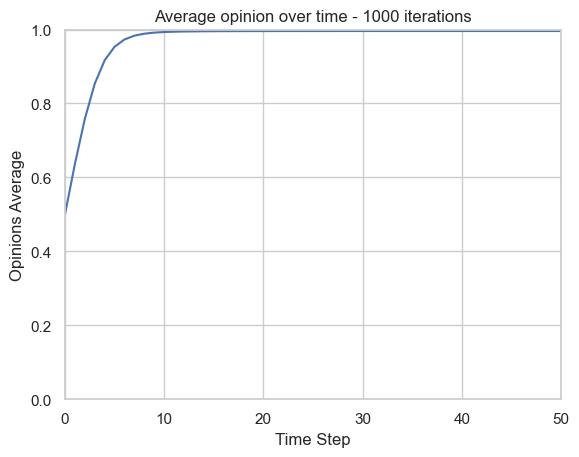

In [27]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")

plt.xlim(0, 50)
plt.ylim(0,1)

plt.show()

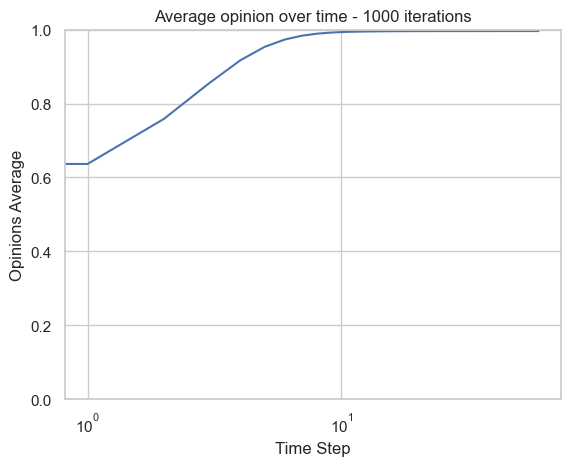

In [28]:
sns.lineplot(x="Step", y="op_avg", data = mean_df)

plt.title('Average opinion over time - 1000 iterations')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")

plt.ylim(0,1)
plt.xscale('log')

plt.show()

This is identical to the result in the paper 

## Phase 6) G&V model from OOD with I

- **Population size:** 1000
- **opinion update method :** Deﬀuant model 
- **Network :** Random Graph (avg node degree = 5)
- **Changes :** Add institution Information (I) to the final GV model I implemented from the model description (phase 4)
- **Model output:** average opinion + simulation duration


In [26]:
model = opinionsModel(N = 1000, avg_node_degree = 5, inst_info = 1)

#### Run the model

In [27]:
while (True):
    prev_avg = opinion_avg(model)
    model.step()
    new_avg = opinion_avg(model)
    
    if abs(new_avg - prev_avg) < 0.00001:
        break


In [28]:
model_data = model.datacollector.get_model_vars_dataframe()

#### Visualize the model output:

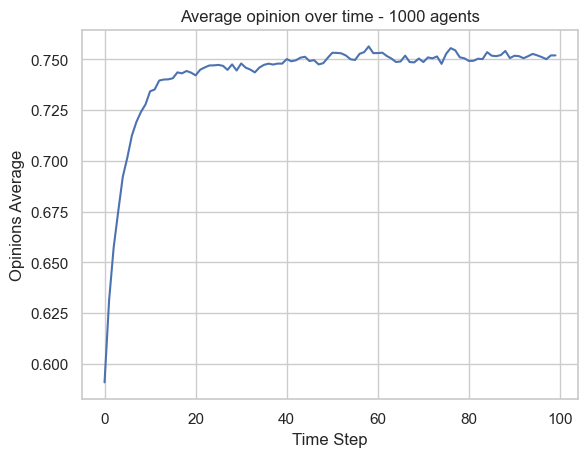

In [29]:
sns.lineplot(x=[i for i in range(len(model_data))], y="op_avg", data = model_data)

plt.title('Average opinion over time - 1000 agents')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

### Batch run

In [31]:
params = {
    "N": 1000,  
    "avg_node_degree" : 5,
    "inst_info" : [0, 0.5, 1],
}

results = mesa.batch_run(
    opinionsModel,
    parameters = params,
    iterations = 100,  # Number of model runs per parameter combination
    max_steps = 500,  # Maximum number of steps per model run
    number_processes = 1,
    data_collection_period = 1,
    display_progress = True,
)

  0%|                                                   | 0/300 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|█████████████████████████████████████████| 300/300 [11:59<00:00,  2.40s/it]


In [32]:
results_df = pd.DataFrame(results)
results_df.to_csv("Results/V03.7_Complete_GV_with_I.csv", index=False)

In [33]:
df = pd.read_csv('Results/V03.7_Complete_GV_with_I.csv')

In [74]:
new_df = df.groupby(['iteration', 'inst_info']).last().reset_index()

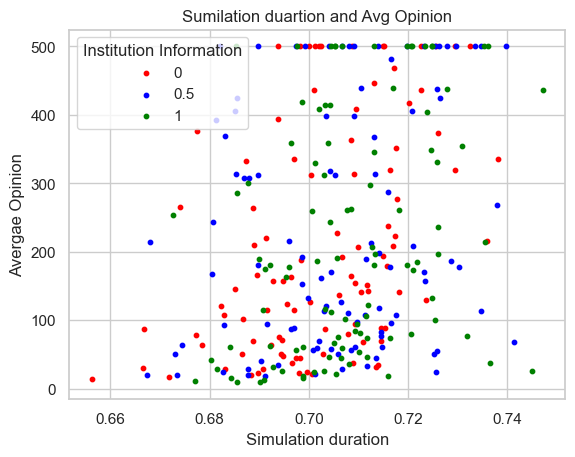

In [83]:
x = np.arange(0.0, 1.1, 0.1)

# Documented data
x = list(new_df.query('inst_info == 0')['op_avg'])
y = list(new_df.query('inst_info == 0')['Step'])
plt.scatter(x, y, marker='o', color = "red" , s = 10, label = "0")

x2 = list(new_df.query('inst_info == 0.5')['op_avg'])
y2 = list(new_df.query('inst_info == 0.5')['Step'])
plt.scatter(x2, y2, marker='o', color = "blue", s = 10, label = "0.5")

x2 = list(new_df.query('inst_info == 1')['op_avg'])
y2 = list(new_df.query('inst_info == 1')['Step'])
plt.scatter(x2, y2, marker='o', color = "green", s = 10, label = "1")

plt.legend(title="Institution Information")

plt.title("Sumilation duartion and Avg Opinion")
plt.xlabel('Simulation duration')
plt.ylabel('Avergae Opinion')

plt.show()

No sepcific findings

In [18]:
new_df = df.groupby('iteration').last().reset_index()

In [58]:
new_df = pd.DataFrame(df.groupby(['Step','inst_info'])['op_avg'].mean())

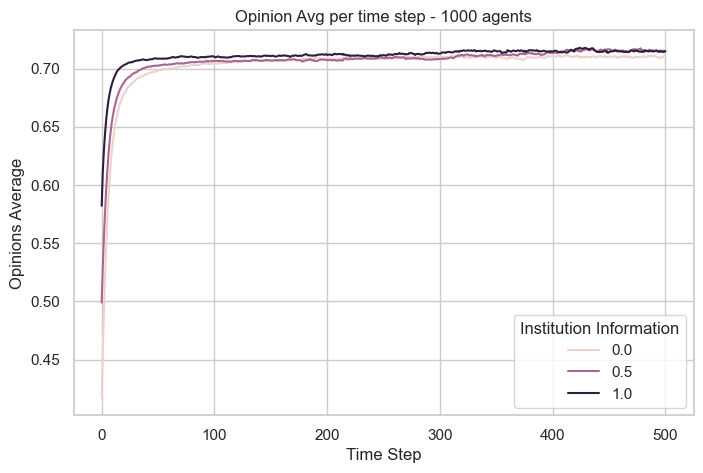

In [72]:
plt.figure(figsize=(8,  5))
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=new_df)

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step - 1000 agents")

plt.show()

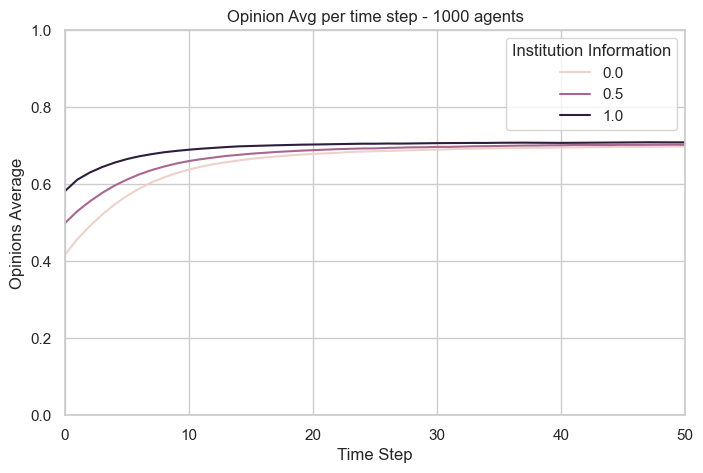

In [67]:
plt.figure(figsize=(8,  5))
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=new_df)

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step - 1000 agents")

# plt.xscale('log')
plt.ylim(0,1)
plt.xlim(0, 50)

plt.show()

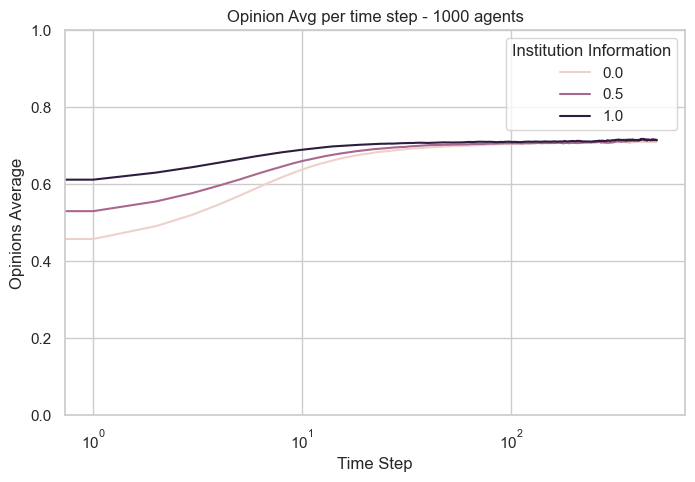

In [71]:
plt.figure(figsize=(8,  5))
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=new_df)

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step - 1000 agents")

plt.ylim(0,1)
plt.xscale('log')

plt.show()

## Phase 7) G&V model from C code with I

- **Population size:** 1000
- **opinion update method :** Deﬀuant model 
- **Network :** Random Graph (avg node degree = 5)
- **Changes :** Add institution Information (I) to the final GV model implemented from the C code description (phase 5) .. make the code for updating opinion based on the risk when reciving I information similar to when engaging in peer-to-peer communication
- **Model output:** average opinion + simulation duration


In [11]:
model = opinionsModel(N = 1000, avg_node_degree = 5, inst_info = 0.5)

#### Run the model

In [12]:
while (True):
    prev_avg = opinion_avg(model)
    model.step()
    new_avg = opinion_avg(model)
    
    if abs(new_avg - prev_avg) < 0.00001:
        break


In [13]:
model_data = model.datacollector.get_model_vars_dataframe()

#### Visualize the model output:

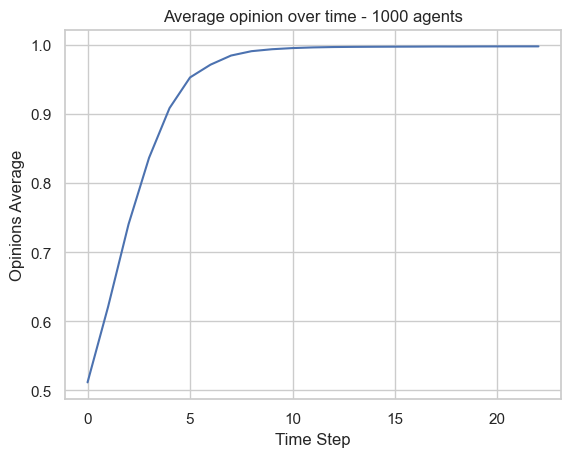

In [14]:
sns.lineplot(x=[i for i in range(len(model_data))], y="op_avg", data = model_data)

plt.title('Average opinion over time - 1000 agents')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()

### Batch run

In [15]:
params = {
    "N": 1000,  
    "avg_node_degree" : 5,
    "inst_info" : [0, 0.5, 1],
}

results = mesa.batch_run(
    opinionsModel,
    parameters = params,
    iterations = 100,  # Number of model runs per parameter combination
    max_steps = 500,  # Maximum number of steps per model run
    number_processes = 1,
    data_collection_period = 1,
    display_progress = True,
)

  0%|                                                   | 0/300 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|█████████████████████████████████████████| 300/300 [01:41<00:00,  2.95it/s]


In [16]:
results_df = pd.DataFrame(results)
results_df.to_csv("Results/V03.8_GV_communicate_function_with_I.csv", index=False)

In [17]:
df = pd.read_csv('Results/V03.8_GV_communicate_function_with_I.csv')

In [18]:
new_df = df.groupby(['iteration', 'inst_info']).last().reset_index()

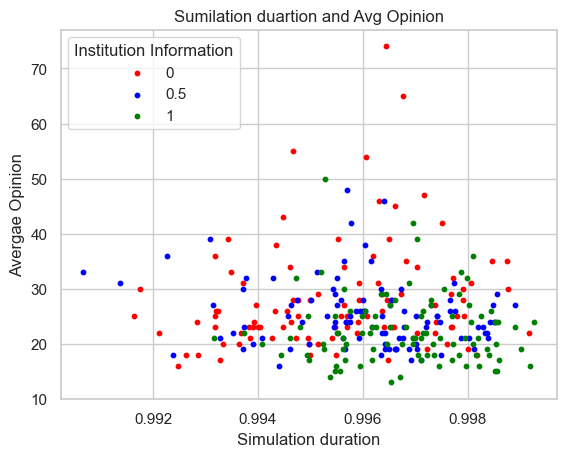

In [19]:
x = np.arange(0.0, 1.1, 0.1)

# Documented data
x = list(new_df.query('inst_info == 0')['op_avg'])
y = list(new_df.query('inst_info == 0')['Step'])
plt.scatter(x, y, marker='o', color = "red" , s = 10, label = "0")

x2 = list(new_df.query('inst_info == 0.5')['op_avg'])
y2 = list(new_df.query('inst_info == 0.5')['Step'])
plt.scatter(x2, y2, marker='o', color = "blue", s = 10, label = "0.5")

x2 = list(new_df.query('inst_info == 1')['op_avg'])
y2 = list(new_df.query('inst_info == 1')['Step'])
plt.scatter(x2, y2, marker='o', color = "green", s = 10, label = "1")

plt.legend(title="Institution Information")

plt.title("Sumilation duartion and Avg Opinion")
plt.xlabel('Simulation duration')
plt.ylabel('Avergae Opinion')

plt.show()

In [23]:
new_df = pd.DataFrame(df.groupby(['Step','inst_info'])['op_avg'].mean())

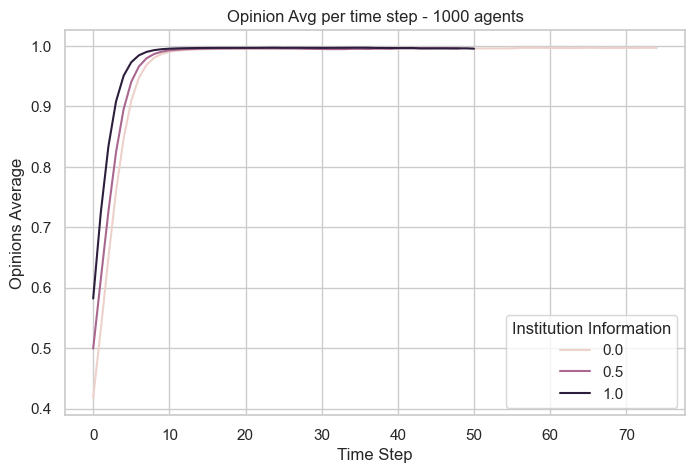

In [24]:
plt.figure(figsize=(8,  5))
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=new_df)

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step - 1000 agents")

plt.show()

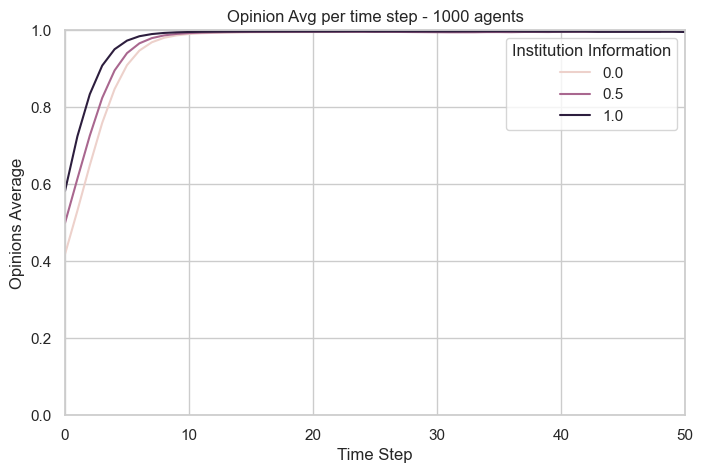

In [25]:
plt.figure(figsize=(8,  5))
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=new_df)

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step - 1000 agents")

# plt.xscale('log')
plt.ylim(0,1)
plt.xlim(0, 50)

plt.show()

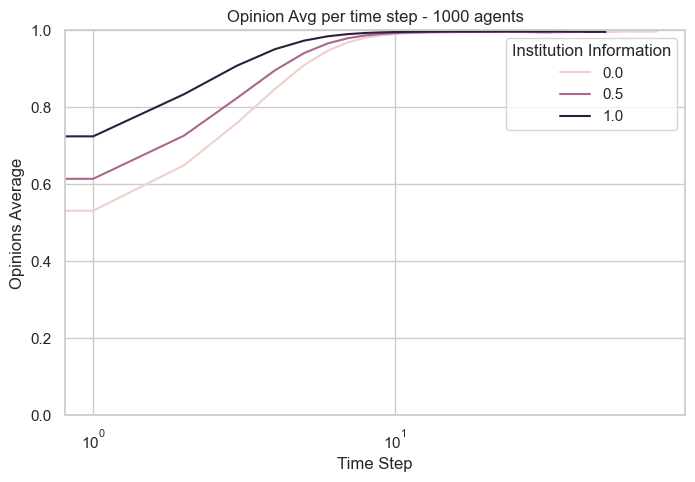

In [26]:
plt.figure(figsize=(8,  5))
sns.lineplot(x="Step", y="op_avg", hue="inst_info", data=new_df)

plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.legend(title="Institution Information")
plt.title("Opinion Avg per time step - 1000 agents")

plt.ylim(0,1)
plt.xscale('log')

plt.show()

## Tracing the model output for small population

In [9]:
model = opinionsModel(N = 6, inst_info = -1)

#### Run the model

In [10]:
while (True):
    prev_avg = opinion_avg(model)
    model.step()
    new_avg = opinion_avg(model)
    
    if abs(new_avg - prev_avg) < 0.01:
        break


In [11]:
model_data = model.datacollector.get_model_vars_dataframe()
agents_data = model.datacollector.get_agent_vars_dataframe()

In [12]:
model_data

,op_avg
0,0.579630
1,0.543766
2,0.515926
3,0.549052
4,0.612614
5,0.644919
6,0.654056


In [13]:
agents_data['opinion'] = agents_data['opinion'].round(2)
agents_data['tendency_to_share'] = agents_data['tendency_to_share'].round(2)
agents_data['peer_trust'] = agents_data['peer_trust'].round(2)
agents_data['other_opinion'] = agents_data['other_opinion'].round(2)

In [14]:
agents_data

opinion  peer_trust  risk_sensitivity  tendency_to_share  \
Step AgentID                                                             
0    0           1.00        0.45                 0               0.98   
     1           0.20        0.40                 0               0.02   
     2           0.18        0.91                 0               0.81   
     3           0.99        0.48                 2               0.33   
     4           0.61        0.97                 2               0.33   
     5           0.49        0.26                 2               0.64   
1    0           0.50        0.45                 0               0.98   
     1           0.13        0.40                 0               0.02   
     2           0.28        0.91                 0               0.81   
     3           1.00        0.48                 2               0.33   
     4           0.61        0.97                 2               0.33   
     5           0.75        0.26                 2               0.64   
2    0           0.24        0.45                 0               0.98   
     1           0.21        0.40                 0               0.02   
     2           0.47        0.91                 0               0.81   
     3           0.83        0.48                 2               0.33   
     4           0.61        0.97                 2               0.33   
     5           0.75        0.26                 2               0.64   
3    0           0.17        0.45                 0               0.98   
     1           0.11        0.40                 0               0.02   
     2           0.47        0.91                 0               0.81   
     3           0.92        0.48                 2               0.33   
     4           0.87        0.97                 2               0.33   
     5           0.75        0.26                 2               0.64   
4    0           0.17        0.45                 0               0.98   
     1           0.18        0.40                 0               0.02   
     2           0.44        0.91                 0               0.81   
     3           0.96        0.48                 2               0.33   
     4           0.96        0.97                 2               0.33   
     5           0.96        0.26                 2               0.64   
5    0           0.27        0.45                 0               0.98   
     1           0.18        0.40                 0               0.02   
     2           0.47        0.91                 0               0.81   
     3           0.98        0.48                 2               0.33   
     4           0.99        0.97                 2               0.33   
     5           0.98        0.26                 2               0.64   
6    0           0.29        0.45                 0               0.98   
     1           0.18        0.40                 0               0.02   
     2           0.47        0.91                 0               0.81   
     3           0.98        0.48                 2               0.33   
     4           1.00        0.97                 2               0.33   
     5           1.00        0.26                 2               0.64   

              shared  updated  other_opinion  other_agent_ID  
Step AgentID                                                  
0    0             0        0           0.00               0  
     1             0        0           0.00               0  
     2             0        0           0.00               0  
     3             0        0           0.00               0  
     4             0        0           0.00               0  
     5             0        0           0.00               0  
1    0             1        0           0.49               5  
     1             0        1           0.18               2  
     2             0        1           0.20               1  
     3             1        1           1.00               0  
 

In [15]:
agents_data.query('AgentID == 0')

,,opinion,peer_trust,risk_sensitivity,tendency_to_share,shared,updated,other_opinion,other_agent_ID
Step,AgentID,,,,,,,,
0,0,1.00,0.45,0,0.98,0,0,0.00,0
1,0,0.50,0.45,0,0.98,1,0,0.49,5
2,0,0.24,0.45,0,0.98,0,0,0.47,2
3,0,0.17,0.45,0,0.98,0,1,0.75,5
4,0,0.17,0.45,0,0.98,1,0,0.47,2
5,0,0.27,0.45,0,0.98,0,1,0.18,1
6,0,0.29,0.45,0,0.98,0,1,0.99,4


#### Visualize the model output:

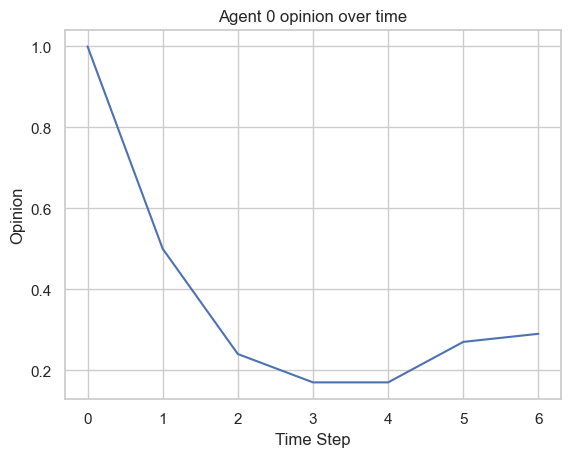

In [22]:
d = agents_data.query('AgentID == 0')
sns.lineplot(x=[i for i in range(len(model_data))], y="opinion", data = d)

plt.title('Agent 0 opinion over time')
plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

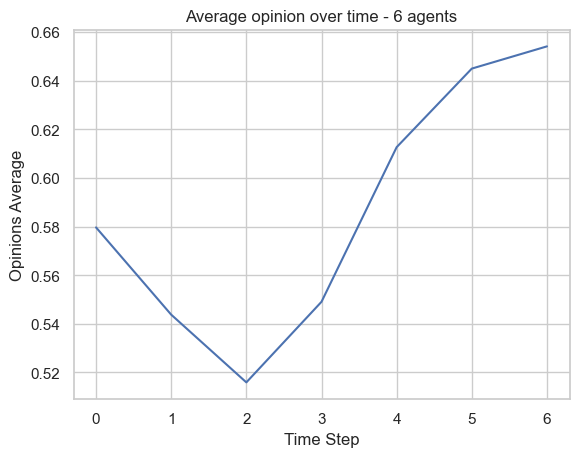

In [17]:
sns.lineplot(x=[i for i in range(len(model_data))], y="op_avg", data = model_data)

plt.title('Average opinion over time - 6 agents')
plt.xlabel("Time Step")
plt.ylabel("Opinions Average")
plt.show()